In [71]:
#we import the libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import interpolate
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import LogLocator

In [72]:
#we define the method to use to differentiate. All is written in single precision

def forward_method(h, f, x):
  h = np.float32(h)
  x = np.float32(x)
  der = np.float32((f(x+h)-f(x))/h)
  return np.float32(der)

def central_method(h, f, x):
  h = np.float32(h)
  x = np.float32(x)
  der = np.float32((f(x+h)-f(x-h))/(2*h))
  return np.float32(der)

def extrapolated_method(h, f, x):
    h = np.float32(h)
    x = np.float32(x)
    term1 = np.float32((f(x + h) - f(x - h)) / (2 * h))
    term2 = np.float32((f(x + h/2) - f(x - h/2)) / h)
    return np.float32((4 * term2 - term1) / 3)

In [73]:
# Single precision
h = np.float32(1e-1)
points = [np.float32(0.1), np.float32(10.0)]

#functions
functions = [("cos", np.cos), ("exp", np.exp)]

for name, f in functions:
    print(f"\n{name}(x) derivative approximation:\n")
    for x in points:
        x = np.float32(x)
        dForward = np.float32(forward_method(h, f, x))
        dCentral = np.float32(central_method(h, f, x))
        dExtrapolated = np.float32(extrapolated_method(h, f, x))
        
        print(f"x = {x}")
        print(f"  Forward diff: {dForward}")
        print(f"  Central diff: {dCentral}")
        print(f"  Extrapolated diff: {dExtrapolated}")


cos(x) derivative approximation:

x = 0.10000000149011612
  Forward diff: -0.1493757963180542
  Central diff: -0.0996670126914978
  Extrapolated diff: -0.09983351081609726
x = 10.0
  Forward diff: 0.5850356817245483
  Central diff: 0.5431169271469116
  Extrapolated diff: 0.5440229177474976

exp(x) derivative approximation:

x = 0.10000000149011612
  Forward diff: 1.1623179912567139
  Central diff: 1.1070138216018677
  Extrapolated diff: 1.1051708459854126
x = 10.0
  Forward diff: 23165.546875
  Central diff: 22063.28125
  Extrapolated diff: 22026.537109375


In [74]:
#definition of the functions to compute the relative error
def err_rel(approx, exact_func, x):
    exact = np.float32(exact_func(np.float32(x)))
    return abs(np.float32((approx - exact)/exact))

#the following function is constructed to compute the relative error
def compute_relative_errors(f, f_prime, x, h_values):
    err_fwd, err_cnt, err_ext = [], [], []
    for h in h_values:
        dF = forward_method(h, f, x)
        dC = central_method(h, f, x)
        dE = extrapolated_method(h, f, x)

        err_fwd.append(err_rel(dF, f_prime, x))
        err_cnt.append(err_rel(dC, f_prime, x))
        err_ext.append(err_rel(dE, f_prime, x))
    return err_fwd, err_cnt, err_ext

#the following to determine the theoretical extimated error for the foward method
def err_ext_foward(h, ddf_func, f_func, df_func, x):
    x = np.float32(x)
    epsilon_m = np.float32(1e-7)

    ddf_val = np.float32(ddf_func(x))      # second derivative
    f_val = np.float32(f_func(x))          # function
    df_val = np.float32(df_func(x))        # true derivative

    err_abs = (h / 2) * ddf_val + epsilon_m * f_val / h
    err_rel = abs(np.float32(err_abs / df_val))  # relative error

    return err_rel

#now we compute the error for central method
def err_ext_central(h, dddf_func, f_func, df_func, x):
    x = np.float32(x)
    epsilon_m = np.float32(1e-7)

    dddf_val = np.float32(dddf_func(x))     # third derivative
    f_val = np.float32(f_func(x))           #function
    df_val = np.float32(df_func(x))         #true derivative

    err_abs = (h**2 / 6) * dddf_val + epsilon_m * f_val / h
    err_rel = abs(np.float32(err_abs / df_val))  #relative error

    return err_rel


def err_ext_extrapolated(h, dddddf_func, f_func, df_func, x):
    x = np.float32(x)
    epsilon_m = np.float32(1e-7)

    dddddf_val = np.float32(dddddf_func(x))     
    f_val = np.float32(f_func(x))         
    df_val = np.float32(df_func(x))        

    err_abs = (h**4) * dddddf_val + epsilon_m * f_val / h
    err_rel = abs(np.float32(err_abs / df_val)) 

    return err_rel


In [75]:
#this function is to compute the relative error in the case of the f(x) = cos(x)

h_values = np.logspace(-8, 1, 50, dtype=np.float32)

# Function and its derivative only for cos(x)
functions = [
    (np.cos, lambda x: -np.sin(x))
]

for i, (f, f_prime) in enumerate(functions):
    x = np.float32(0.1)
    err_fwd_cos01, err_cnt_cos01, err_ext_cos01 = compute_relative_errors(f, f_prime, x, h_values)

for i, (f, f_prime) in enumerate(functions):
    x = 10
    err_fwd_cos10, err_cnt_cos10, err_ext_cos10 = compute_relative_errors(f, f_prime, x, h_values)

In [76]:
#this function is to compute the relative error in the case of the f(x) = exp(x)
h_values = np.logspace(-8, 1, 50, dtype=np.float32)

# Function and it derivative only for exp(x)
functions2 = [
    (np.exp, lambda x: np.exp(x))
]

for i, (f, f_prime) in enumerate(functions2):
    x = np.float32(0.1)
    err_fwd_exp01, err_cnt_exp01, err_ext_exp01 = compute_relative_errors(f, f_prime, x, h_values)

for i, (f, f_prime) in enumerate(functions2):
    x1 = 10
    err_fwd_exp10, err_cnt_exp10, err_ext_exp10 = compute_relative_errors(f, f_prime, x1, h_values)

In [77]:
# Algorithm to obtain the thoeretica relative error in x = 0.1 and 10 for all methods for f(x) = cos(x)

f_func = lambda x: np.float32(np.cos(x)) #this is just a definition

ddf_func = lambda x: np.float32(-np.cos(x)) #this is the second derivative
dddf_func = lambda x: np.float32(np.sin(x)) #this is the third derivative
df_func = lambda x: -np.float32(np.sin(x))
dddddf_func = lambda x: -np.float32(np.sin(x))

err_true_fwd_cos01 = err_ext_foward(h_values, ddf_func, f_func, df_func, x=np.float32(0.1))
err_true_cnt_cos01 = err_ext_central(h_values, dddf_func, f_func, df_func, x=np.float32(0.1))
err_true_ext_cos01 = err_ext_extrapolated(h_values, dddddf_func, f_func, df_func, x=np.float32(0.1))

err_true_fwd_cos10 = err_ext_foward(h_values, ddf_func, f_func, df_func, x = 10)
err_true_cnt_cos10 = err_ext_central(h_values, dddf_func, f_func, df_func, x = 10)
err_true_ext_cos10 = err_ext_extrapolated(h_values, dddddf_func, f_func, df_func, x=10)

In [78]:
# Algorithm to obtain the theoretical relative error in x = 0.1, 10 for all methods for f(x) = exp(x)
f_func = lambda x: np.float32(np.exp(x)) #this is  also all the others derivatives

err_true_fwd_exp01 = err_ext_foward(h_values, f_func, f_func, f_func, x=np.float32(0.1))
err_true_cnt_exp01 = err_ext_central(h_values, f_func, f_func, f_func, x=np.float32(0.1))
err_true_ext_exp01 = err_ext_extrapolated(h_values, f_func, f_func, f_func, x=np.float32(0.1))

err_true_fwd_exp10 = err_ext_foward(h_values, f_func, f_func, f_func, x = 10)
err_true_cnt_exp10 = err_ext_central(h_values, f_func, f_func, f_func, x = 10)
err_true_ext_exp10 = err_ext_extrapolated(h_values, f_func, f_func, f_func, x=10)

Plot for Errors in Numerical Derivative

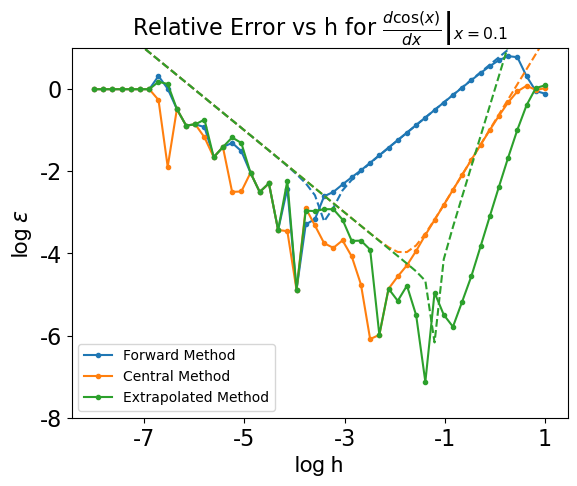

In [ ]:
#plt.figure(figsize=(6, 8))

color_fwd = "tab:blue"
color_cnt = "tab:orange"
color_ext = "tab:green"

plt.loglog(h_values, err_fwd_cos01, label='Forward Method', marker=".", color=color_fwd)
plt.loglog(h_values, err_true_fwd_cos01, color=color_fwd, linestyle="--")

plt.loglog(h_values, err_cnt_cos01, label='Central Method', marker=".", color=color_cnt)
plt.loglog(h_values, err_true_cnt_cos01, color=color_cnt, linestyle="--")

plt.loglog(h_values, err_ext_cos01, label='Extrapolated Method', marker=".", color=color_ext)
plt.loglog(h_values, err_true_ext_cos01, color=color_ext, linestyle="--")

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(1e-8,1e1)
plt.xlabel("log h", fontsize = 16, fontname ='Arial')
plt.ylabel("log $\\epsilon$", fontsize = 16, fontname ='Arial')
plt.title(r"Relative Error vs h for $\left.\frac{d\cos(x)}{dx}\right|_{x=0.1}$", fontsize = 16)

#functions to obtain a better graphic
formatter = FuncFormatter(lambda y, _: '{:.0f}'.format(np.log10(y)))

plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.gca().xaxis.set_major_locator(LogLocator(base=10.0))
plt.gca().yaxis.set_major_locator(LogLocator(base=10.0))

plt.tick_params(axis='both', which='major', labelsize=16)

plt.legend(fontsize=10)

#plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

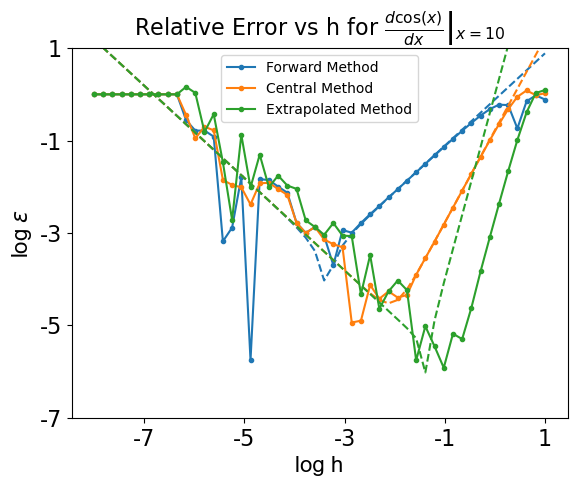

In [ ]:
color_fwd = "tab:blue"
color_cnt = "tab:orange"
color_ext = "tab:green"

plt.loglog(h_values, err_fwd_cos10, label='Forward Method', marker=".", color=color_fwd)
plt.loglog(h_values, err_true_fwd_cos10, color=color_fwd, linestyle="--")

plt.loglog(h_values, err_cnt_cos10, label='Central Method', marker=".", color=color_cnt)
plt.loglog(h_values, err_true_cnt_cos10, color=color_cnt, linestyle="--")

plt.loglog(h_values, err_ext_cos10, label='Extrapolated Method', marker=".", color=color_ext)
plt.loglog(h_values, err_true_ext_cos10, color=color_ext, linestyle="--")

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("log h", fontsize = 16, fontname ='Arial')
plt.ylabel("log $\\epsilon$", fontsize = 16, fontname ='Arial')
plt.ylim(1e-7,1e1)
plt.title(r"Relative Error vs h for $\left.\frac{d\cos(x)}{dx}\right|_{x=10}$", fontsize=16)

formatter = FuncFormatter(lambda y, _: '{:.0f}'.format(np.log10(y)))

plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.gca().xaxis.set_major_locator(LogLocator(base=10.0))
plt.gca().yaxis.set_major_locator(LogLocator(base=10.0))

plt.tick_params(axis='both', which='major', labelsize=16)

plt.legend(fontsize=10)

#plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


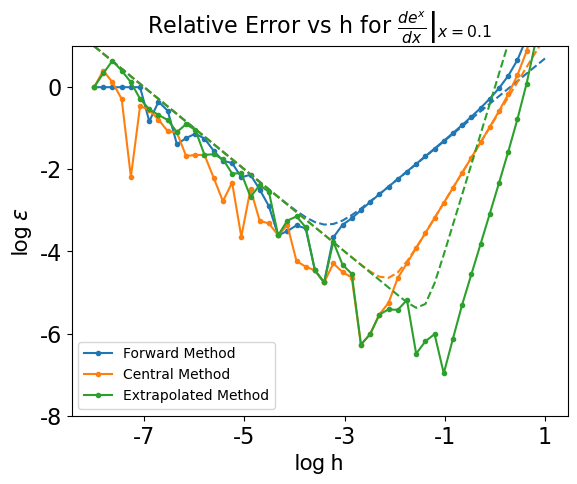

In [ ]:
#plt.figure(figsize=(6, 8))

color_fwd = "tab:blue"
color_cnt = "tab:orange"
color_ext = "tab:green"

plt.loglog(h_values, err_fwd_exp01, label='Forward Method', marker=".", color=color_fwd)
plt.loglog(h_values, err_true_fwd_exp01, color=color_fwd, linestyle="--")

plt.loglog(h_values, err_cnt_exp01, label='Central Method', marker=".", color=color_cnt)
plt.loglog(h_values, err_true_cnt_exp01, color=color_cnt, linestyle="--")

plt.loglog(h_values, err_ext_exp01, label='Extrapolated Method', marker=".", color=color_ext)
plt.loglog(h_values, err_true_ext_exp01, color=color_ext, linestyle="--")

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(1e-8,1e1)
plt.xlabel("log h", fontsize = 16, fontname ='Arial')
plt.ylabel("log $\\epsilon$", fontsize = 16, fontname ='Arial')
plt.title(r"Relative Error vs h for $\left.\frac{de^x}{dx}\right|_{x=0.1}$", fontsize = 16)

formatter = FuncFormatter(lambda y, _: '{:.0f}'.format(np.log10(y)))

plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.gca().xaxis.set_major_locator(LogLocator(base=10.0))
plt.gca().yaxis.set_major_locator(LogLocator(base=10.0))

plt.tick_params(axis='both', which='major', labelsize=16)

plt.legend(fontsize=10)

#plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

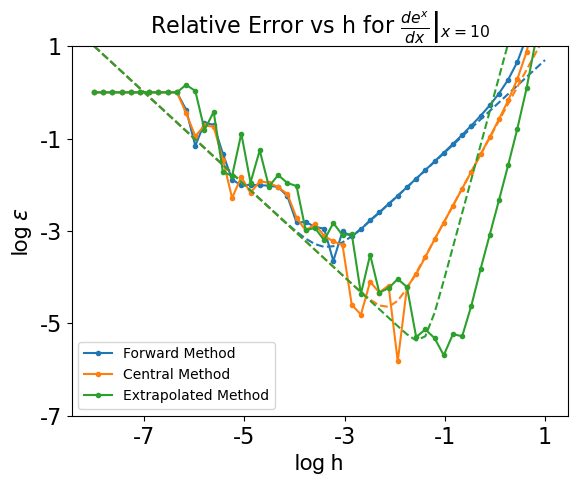

In [ ]:
# plt.subplot(4, 1, 4) 
color_fwd = "tab:blue"
color_cnt = "tab:orange"
color_ext = "tab:green"

plt.loglog(h_values, err_fwd_exp10, label='Forward Method', marker=".", color=color_fwd)
plt.loglog(h_values, err_true_fwd_exp10, color=color_fwd, linestyle="--")

plt.loglog(h_values, err_cnt_exp10, label='Central Method', marker=".", color=color_cnt)
plt.loglog(h_values, err_true_cnt_exp10, color=color_cnt, linestyle="--")

plt.loglog(h_values, err_ext_exp10, label='Extrapolated Method', marker=".", color=color_ext)
plt.loglog(h_values, err_true_ext_exp10, color=color_ext, linestyle="--")

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("log h", fontsize = 16, fontname ='Arial')
plt.ylabel("log $\\epsilon$", fontsize = 16, fontname ='Arial')
plt.ylim(1e-7,1e1)
plt.title(r"Relative Error vs h for $\left.\frac{de^x}{dx}\right|_{x=10}$", fontsize = 16)

formatter = FuncFormatter(lambda y, _: '{:.0f}'.format(np.log10(y)))

plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.gca().xaxis.set_major_locator(LogLocator(base=10.0))
plt.gca().yaxis.set_major_locator(LogLocator(base=10.0))

plt.tick_params(axis='both', which='major', labelsize=16)

plt.legend(fontsize=10)

#plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

Exercise 2

In [83]:
#Midpoitn Method
def midpoint_method(N, xi, xf, f):
    h = np.float32((xf - xi) / N)
    total = 0.0
    for i in range(N):
        x_mid = np.float32(xi + (i + 0.5) * h)
        total += np.float32(f(x_mid))
    return np.float32(h * total)

#Trapezoid Method
def trapezoid_method(N, xi, xf, f):
    h = np.float32((xf - xi) / N)
    total = np.float32(0.5 * (f(xi) + f(xf)))
    for i in range(1, N):
        x = np.float32(xi + i * h)
        total += np.float32(f(x))
    return np.float32(h * total)

#Simpson Method

def simpson_method(N, xi, xf, f):
    if N % 2 == 1:
        N += 1  # Simpson N even
    h = np.float32((xf - xi) / N)
    total = np.float32(f(xi) + f(xf))
    for i in range(1, N):
        x = np.float32(xi + i * h)
        if i % 2 == 0:
            total += np.float32(2 * f(x))
        else:
            total += np.float32(4 * f(x))
    return np.float32(h / 3 * total)


In [84]:
#we take the function to integrate which is exp(t), with t in [0,1].
N = 1000
xi = 0
xf = 1

f = lambda x: np.exp(-x).astype(np.float32)  #function

int_mid = midpoint_method(N, xi, xf, f)
int_trape = trapezoid_method(N, xi, xf, f)
int_simp = simpson_method(N, xi, xf, f)

print("Numerical integration with Midpoint method:", int_mid, "\n")
print("Numerical integration with Trapezoid method:", int_trape, "\n")
print("Numerical integration with Simpson method:", int_simp, "\n")

Numerical integration with Midpoint method: 0.6321205 

Numerical integration with Trapezoid method: 0.6321207 

Numerical integration with Simpson method: 0.63212097 



Error plots

In [85]:
#we define the correct value of the integral since it will be usefull to 
f_true = np.float32((np.exp(1)-1)/np.exp(1))
f_true

np.float32(0.63212055)

In [86]:
err_mid = []
Index = []
xi = np.float32(0)
xf = np.float32(1)

N_values = np.unique(np.logspace(0, 6, num=20, dtype=int)) #we consider just value of N distributed regularly in a logaritmic scale

for N in N_values:
  int_mid = midpoint_method(N, xi, xf, f)
  err_midpoint = abs(int_mid - f_true)/abs(f_true)
  err_mid.append(err_midpoint)
  Index.append(N)

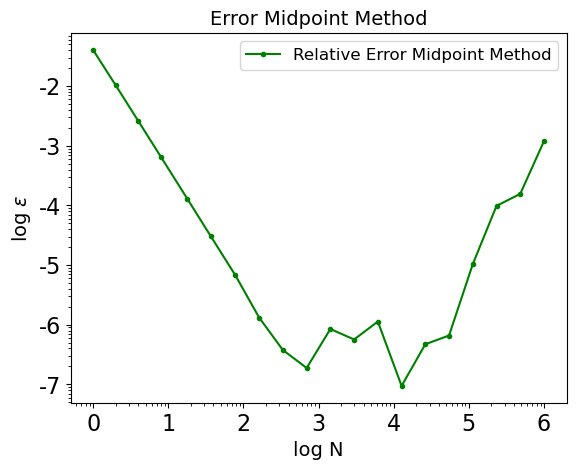

In [ ]:
plt.loglog(Index, err_mid, label="Relative Error Midpoint Method", color="green", marker =".")

plt.xlabel("log N", fontsize=14)
plt.ylabel(r"log $\epsilon$", fontsize=14)
plt.title("Error Midpoint Method", fontsize=14)


formatter = FuncFormatter(lambda y, _: '{:.0f}'.format(np.log10(y)))

plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.gca().xaxis.set_major_locator(LogLocator(base=10.0))
plt.gca().yaxis.set_major_locator(LogLocator(base=10.0))

plt.tick_params(axis='both', which='major', labelsize=16)

plt.legend(fontsize=12)

#plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


In [88]:
#now for trapezoid method we have
err_trz = []
Index = []
xi = 0
xf = 1

N_values = np.unique(np.logspace(0, 6, num=20, dtype=int))

for N in N_values:
  int_trp = trapezoid_method(N, xi, xf, f)
  err_trapezoid = abs(int_trp - f_true)/abs(f_true)
  err_trz.append(err_trapezoid)
  Index.append(N)

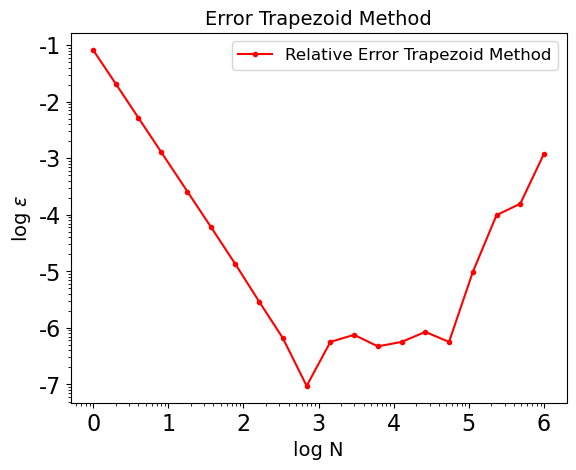

In [ ]:
plt.loglog(Index, err_trz, label='Relative Error Trapezoid Method',color = "red", marker =".")
#axis names
plt.xlabel("log N", fontsize=14)
plt.ylabel(r"log $\epsilon$", fontsize=14)
plt.title("Error Trapezoid Method", fontsize=14)


formatter = FuncFormatter(lambda y, _: '{:.0f}'.format(np.log10(y)))

plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.gca().xaxis.set_major_locator(LogLocator(base=10.0))
plt.gca().yaxis.set_major_locator(LogLocator(base=10.0))

plt.tick_params(axis='both', which='major', labelsize=16)

plt.legend(fontsize=12)

#plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


In [90]:
#error for simpson method 
err_simps = []
Index = []
xi = 0
xf = 1

N_values = np.unique(np.logspace(0, 6, num=20, dtype=int))

for N in N_values:
  int_smp = simpson_method(2*N, xi, xf, f)
  err_simpson = abs(int_smp - f_true)/abs(f_true)
  err_simps.append(err_simpson)
  Index.append(2*N)



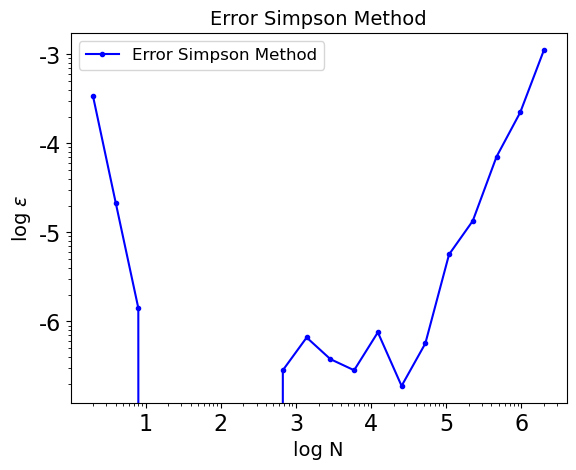

In [91]:
plt.loglog(Index, err_simps, label='Error Simpson Method', color = "blue", marker =".")

#axis names
plt.xlabel("log N", fontsize=14)
plt.ylabel(r"log $\epsilon$", fontsize=14)
plt.title("Error Simpson Method", fontsize=14)


formatter = FuncFormatter(lambda y, _: '{:.0f}'.format(np.log10(y)))

plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.gca().xaxis.set_major_locator(LogLocator(base=10.0))
plt.gca().yaxis.set_major_locator(LogLocator(base=10.0))

plt.tick_params(axis='both', which='major', labelsize=16)

plt.legend(fontsize=12)

#plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

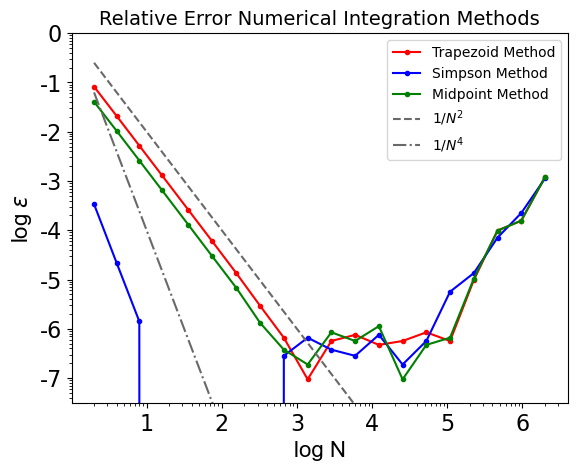

In [92]:
plt.plot(Index, err_trz, label='Trapezoid Method',color = "red", marker = ".")
plt.plot(Index, err_simps, label='Simpson Method', color = "blue", marker = ".")
plt.plot(Index, err_mid, label='Midpoint Method',color = "green", marker = ".")

Index = np.array(Index)

#we add the expected behavior
yMid = 1/(Index**2)
ySimps = 1/(Index**4)

plt.plot(Index, yMid, label = "$1/N^2$", linestyle ="dashed", color = "dimgray")
plt.plot(Index, ySimps, label = "$1/N^4$", linestyle ="-.", color = "dimgray")

#axis names
plt.xlabel("log N", fontsize=16, fontname = "Arial")
plt.ylabel(r"log $\epsilon$", fontsize=16,fontname = "Arial")
plt.ylim(10**(-7.5),10**(0))
plt.xscale("log")
plt.yscale("log")
plt.title("Relative Error Numerical Integration Methods", fontsize=14)


formatter = FuncFormatter(lambda y, _: '{:.0f}'.format(np.log10(y)))

plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.gca().xaxis.set_major_locator(LogLocator(base=10.0))
plt.gca().yaxis.set_major_locator(LogLocator(base=10.0))

plt.tick_params(axis='both', which='major', labelsize=16)

plt.legend(fontsize=10)

#plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

Exercise 3

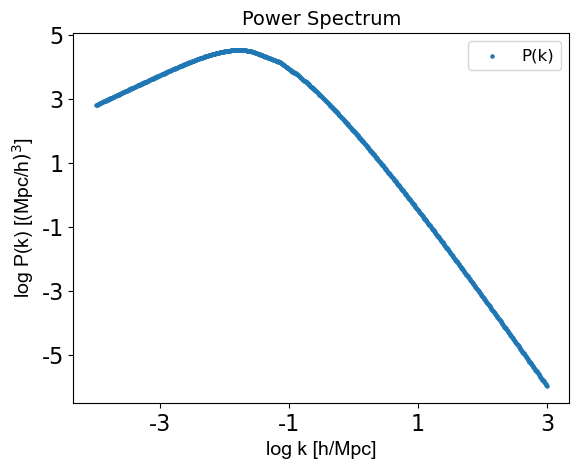

In [93]:
#we need first to import the data
data = np.loadtxt("lcdm_z0.matter_pk")

data.shape #the data are 701 rows and 4 columns. Since we need just to use the first two columns, we create two separate array, one for the first and the other for the second

k = np.zeros(data.shape[0])
Pk = np.zeros(data.shape[0])

k = data[:, 0] #array with all the momemta
Pk = data[:,1] #array with all th power spetra value

#We now make a plot of these data

plt.scatter(k,Pk, s = 5, label="P(k)")

plt.xscale("log")
plt.yscale("log")
#axis names
plt.xlabel("log k [h/Mpc]", fontsize=14, fontname= "Arial")
plt.ylabel("log P(k) [(Mpc/h$)^3$]", fontsize=14, fontname = "Arial")
plt.title("Power Spectrum", fontsize=14)


formatter = FuncFormatter(lambda y, _: '{:.0f}'.format(np.log10(y)))

plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.gca().xaxis.set_major_locator(LogLocator(base=10.0))
plt.gca().yaxis.set_major_locator(LogLocator(base=10.0))

plt.tick_params(axis='both', which='major', labelsize=16)

plt.legend(fontsize=12)

#plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

In [94]:
#we interpolate the function 

#we need to interpolate all this point using the spline interpolation
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d

Interpolated_Pk = CubicSpline(k, Pk)

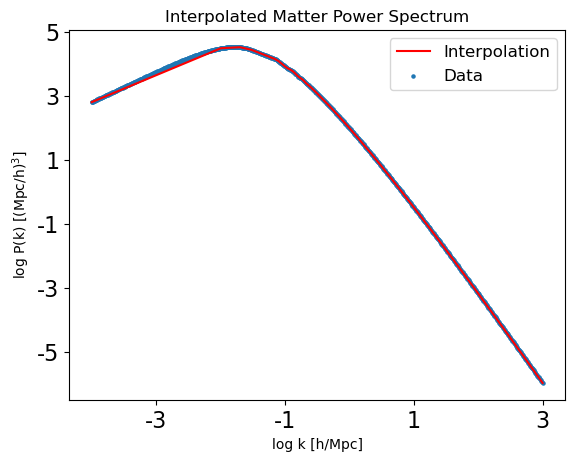

In [95]:
kTrue = np.linspace(1e-4, 1e3, 100000)
Interpolated_Pk1 = Interpolated_Pk(kTrue)

plt.plot(kTrue, Interpolated_Pk1, label='Interpolation',color = "red")
plt.scatter(k,Pk, s = 5, label = 'Data')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("log k [h/Mpc]")
plt.ylabel("log P(k) [(Mpc/h$)^3$]")

plt.title("Interpolated Matter Power Spectrum")
#plt.grid(True, which="both", linestyle="--")
formatter = FuncFormatter(lambda y, _: '{:.0f}'.format(np.log10(y)))

plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.gca().xaxis.set_major_locator(LogLocator(base=10.0))
plt.gca().yaxis.set_major_locator(LogLocator(base=10.0))

plt.tick_params(axis='both', which='major', labelsize=16)

plt.legend(fontsize=12)
plt.show()

In [96]:
# ---- Parameters----
N = 140000
ki = 1e-4
kf = 1e3
r_array = np.arange(50, 120, 1)

# ---- f(k, r) ----
def f(k, r):
    kr = k * r
    with np.errstate(divide='ignore', invalid='ignore'):
        result = (1 / (2 * np.pi**2)) * Interpolated_Pk(k) * (k**2) * (np.sin(kr) / kr) 
        result = np.nan_to_num(result, nan=0.0, posinf=0.0, neginf=0.0)
    return result.astype(np.float32)


#-------------------------------------
# ---- Integral value for each r ----
fi_r = [] 
for r in r_array:
    f_r = lambda k: f(k, r) 
    integral = simpson_method(N, ki, kf, f_r)
    fi_r.append(integral)

f_r = np.array(fi_r)

In [97]:
firstIndex = np.argmax(r_array >= 90)
r_bump = r_array[r_array >= 90] #we select only the region with the bump 
f_bump = f_r[firstIndex:]

max_bump = np.argmax(f_bump)
r_max = r_array[firstIndex + max_bump]#we extrapolate the value of the r max
print(f"Position of the bump in the correlation function: r = {r_max} [Mpc]")
firstIndex

Position of the bump in the correlation function: r = 104 [Mpc]


np.int64(40)

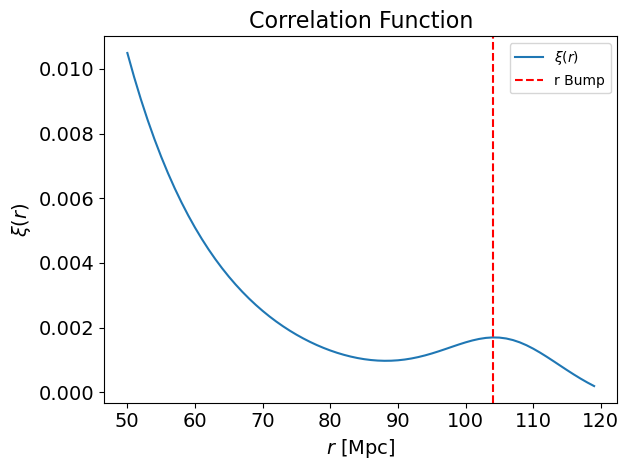

In [98]:
#plt.scatter(r_array, f_r, s = 1, label=r'$\xi(r)$', color='darkred')
plt.plot(r_array, f_r, label=r'$\xi(r)$')
plt.axvline(x=r_max, color='red', linestyle='--', label='r Bump')
plt.xlabel(r'$r$ [Mpc]', fontsize=14)
plt.ylabel(r'$\xi(r)$', fontsize=14)
plt.title(r'Correlation Function', fontsize=16)

plt.tick_params(axis='both', labelsize=14)

#plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [99]:
#CORRELATION FUNCTION TIMES r^2

#CORRELATION FUNCTION 
# ---- Parameters----
N = 140000
ki = 1e-4
kf = 1e3
r_array = np.arange(50, 120, 1) #values in which we compute the integral

# ---- f(k, r) ----
def f(k, r):
    kr = k * r
    with np.errstate(divide='ignore', invalid='ignore'):
        result =(r**2)*(1 / (2 * np.pi**2)) * Interpolated_Pk(k) * (k**2) * (np.sin(kr) / kr)       #function to see the bump (multiplied by r^2)
        result = np.nan_to_num(result, nan=0.0, posinf=0.0, neginf=0.0)
    return result.astype(np.float32)

#-------------------------------------
# ---- Integral value for each r ----
rfi_r = [] 
for r in r_array:
    rf_r = lambda k: f(k, r) 
    integral1 = simpson_method(N, ki, kf, rf_r)
    rfi_r.append(integral1)

rf_r = np.array(rfi_r)

In [100]:
#we find again the maxima of the
firstIndex = np.argmax(r_array >= 90)
r_bump = r_array[r_array >= 90] #we select only the region with the bump 
f_bump = rf_r[firstIndex:]

max_bump = np.argmax(f_bump)
r_max = r_array[firstIndex + max_bump]#we extrapolate the value of the r max
print(f"Position of the bump in the correlation function: r = {r_max} [Mpc]")

Position of the bump in the correlation function: r = 106 [Mpc]


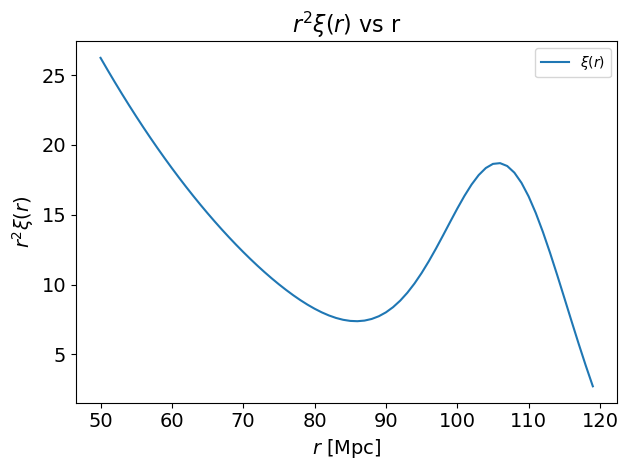

In [101]:
#plt.scatter(r_array, f_r, s = 1, label=r'$\xi(r)$', color='darkred')
plt.plot(r_array, rf_r, label=r'$\xi(r)$')
plt.xlabel(r'$r$ [Mpc]', fontsize=14)
plt.ylabel(r'$r^2\xi(r)$', fontsize=14)
plt.title(r'$r^2\xi(r)$ vs r', fontsize=16)

plt.tick_params(axis='both', labelsize=14) 

#plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


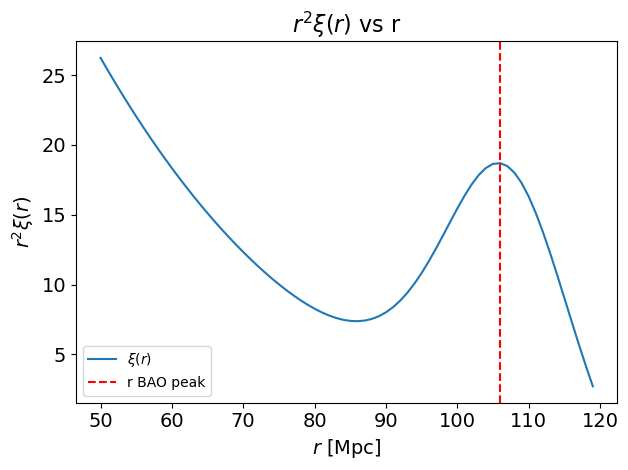

In [102]:
#plt.scatter(r_array, f_r, s = 1, label=r'$\xi(r)$', color='darkred')
plt.plot(r_array, rf_r, label=r'$\xi(r)$')
plt.axvline(x=r_max, color='red', linestyle='--', label='r BAO peak')
plt.xlabel(r'$r$ [Mpc]', fontsize=14)
plt.ylabel(r'$r^2\xi(r)$', fontsize=14)
plt.title(r'$r^2\xi(r)$ vs r', fontsize=16)

plt.tick_params(axis='both', labelsize=14) 

#plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()
